In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
datafiles = !ls data/*.res

In [4]:
datafiles

['data/0001_Ceres.res',
 'data/0002_Pallas.res',
 'data/0003_Juno.res',
 'data/0004_Vesta.res',
 'data/0006_Hebe.res',
 'data/0007_Iris.res',
 'data/0008_Flora.res',
 'data/0009_Metis.res',
 'data/0010_Hygiea.res',
 'data/0012_Victoria.res',
 'data/0019_Fortuna.res',
 'data/0023_Thalia.res',
 'data/0029_Amphitrite.res',
 'data/0052_Europa.res',
 'data/0054_Alexandra.res',
 'data/0088_Thisbe.res',
 'data/0471_Papagena.res',
 'data/0511_Davida.res',
 'data/0532_Herculina.res',
 'data/0704_Interamnia.res']

In [5]:
with open(datafiles[0]) as f:
    lines = f.readlines()

In [6]:
endcol = np.array([0, 19,37,40,51,61,70,80,94,101,117,129,146,158,167,170, \
          179,190,200,211,221,230,238,247,255,263,271,279,287])

In [7]:
inhead = " Date__(UT)__HR:MN Date_________JDUT  SM   R.A._(J2000.0) DEC. dRA*cosD d(DEC)/dt L_Ap_Sid_Time a-mass               r        rdot            delta      deldot    S-O-T /r    S-T-O    GAL_LON    GAL_LAT   ECL_LON    ECL_LAT     CONF100um CONF160um   fd200  fd350  fd450  fd850  fd1300  fd3000[Jy]".split()
inhead = " date JD SM  RA DEC dRA*cosD d(DEC)/dt L_Ap_Sid_Time a-mass r rdot delta deldot S-O-T /r S-T-O GAL_LON GAL_LAT ECL_LON ECL_LAT CONF100um CONF160um fd200 fd350 fd450 fd850 fd1300 fd3000".split()

In [8]:
#df = pd.read_fwf(datafiles[0], skiprows = 73, skipfooter = 113, header=None, \
#            widths = np.diff(endcol), skipinitialspace = True, names=inhead, \
#            index_col="date", parse_dates=True)
#df["source"] = datafiles[0].split("_")[-1].split(".")[0]
#df.head(3)

In [9]:
df = pd.read_fwf(datafiles[0], skiprows = 73, skipfooter = 113, header=None, \
            widths = np.diff(endcol), skipinitialspace = True, names=inhead, parse_dates=[0])
df["source"] = datafiles[0].split("_")[-1].split(".")[0]
df.head(3)

,date,JD,SM,RA,DEC,dRA*cosD,d(DEC)/dt,L_Ap_Sid_Time,a-mass,r,...,ECL_LAT,CONF100um,CONF160um,fd200,fd350,fd450,fd850,fd1300,fd3000,source
0,2010-01-01,2455197.5,Nm,243.21509,-17.10548,59.33260,-13.4627,2.185819,n.a.,2.705894,...,3.98694,2.01,3.68,23.525,8.289,5.127,1.490,0.646,0.123,Ceres
1,2010-01-06,2455202.5,N,245.25571,-17.54391,58.63578,-12.5562,2.514369,n.a.,2.709931,...,3.89276,1.85,3.44,23.830,8.397,5.194,1.510,0.655,0.125,Ceres
2,2010-01-11,2455207.5,N,247.27416,-17.95213,57.82853,-11.6609,2.842918,n.a.,2.713982,...,3.79830,2.55,4.44,24.191,8.525,5.273,1.533,0.665,0.127,Ceres


In [10]:
for file in datafiles[1:]:
    tmp = pd.read_fwf(file, skiprows = 73, skipfooter = 113, header=None, \
            widths = np.diff(endcol), skipinitialspace = True, names=inhead, parse_dates=[0])
    tmp["source"] = file.split("_")[-1].split(".")[0]
    df = pd.concat([df, tmp], axis = 0)

In [11]:
df.columns

Index(['date', 'JD', 'SM', 'RA', 'DEC', 'dRA*cosD', 'd(DEC)/dt',
       'L_Ap_Sid_Time', 'a-mass', 'r', 'rdot', 'delta', 'deldot', 'S-O-T',
       '/r', 'S-T-O', 'GAL_LON', 'GAL_LAT', 'ECL_LON', 'ECL_LAT', 'CONF100um',
       'CONF160um', 'fd200', 'fd350', 'fd450', 'fd850', 'fd1300', 'fd3000',
       'source'],
      dtype='object')

In [12]:
dfm = df[["date","source","fd350","fd450", "fd850", 'SM', 'RA', 'DEC']].set_index("date")

In [13]:
dfm.head()

,source,fd350,fd450,fd850,SM,RA,DEC
date,,,,,,,
2010-01-01,Ceres,8.289,5.127,1.490,Nm,243.21509,-17.10548
2010-01-06,Ceres,8.397,5.194,1.510,N,245.25571,-17.54391
2010-01-11,Ceres,8.525,5.273,1.533,N,247.27416,-17.95213
2010-01-16,Ceres,8.674,5.366,1.560,N,249.26588,-18.33061
2010-01-21,Ceres,8.846,5.472,1.591,Nm,251.22601,-18.68016


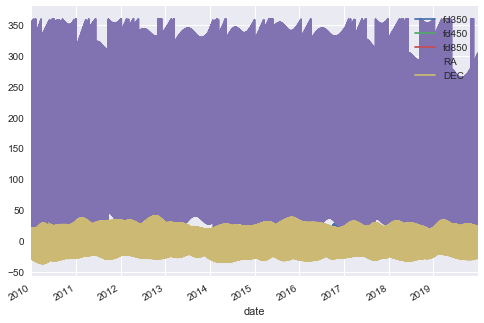

In [14]:
dfm.plot()

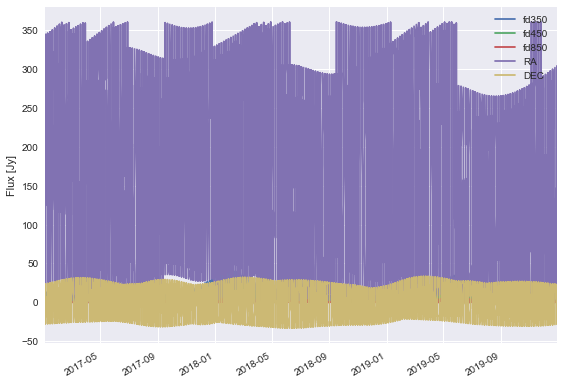

In [15]:
dfm["2017":"2022"].plot()
plt.xlabel("")
plt.ylabel("Flux [Jy]")
plt.tight_layout()

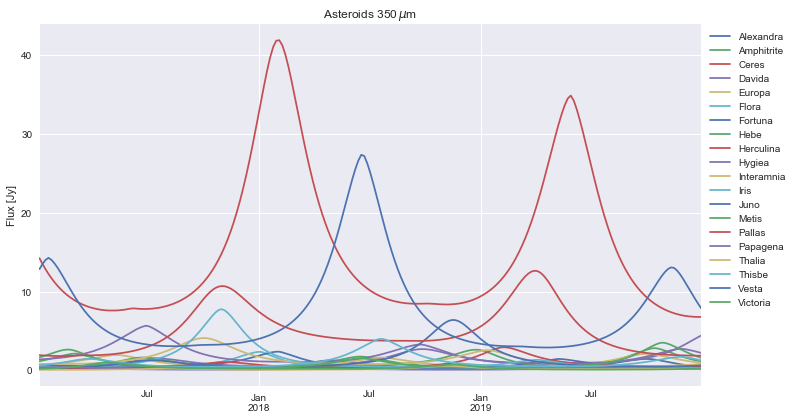

In [16]:
fig, ax = plt.subplots(figsize=(10,6))
for label, df in dfm["2017":"2022"].groupby('source'):
    df.fd350.plot(ax=ax, label=label)
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.ylabel("Flux [Jy]")
plt.title(r"Asteroids 350$\,\mu$m")
plt.xlabel("")
plt.tight_layout()
plt.savefig("asteroids_350.png", bbox_inches="tight", dpi=150)

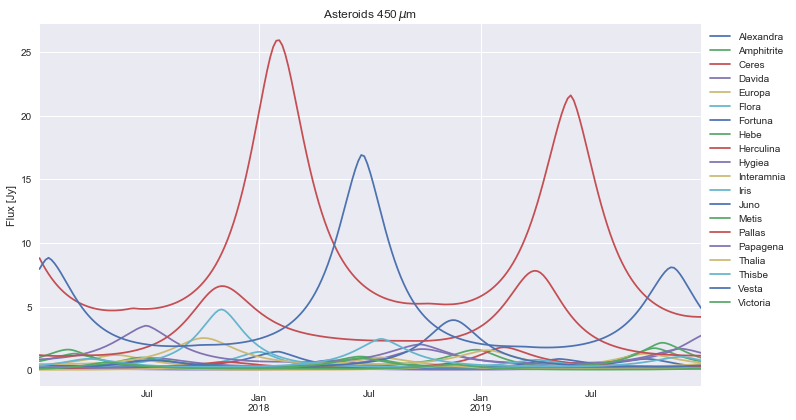

In [17]:
fig, ax = plt.subplots(figsize=(10,6))
for label, df in dfm["2017":"2022"].groupby('source'):
    df.fd450.plot(ax=ax, label=label)
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.ylabel("Flux [Jy]")
plt.title(r"Asteroids 450$\,\mu$m")
plt.xlabel("")
plt.tight_layout()
plt.savefig("asteroids_450.png", bbox_inches="tight", dpi=150)

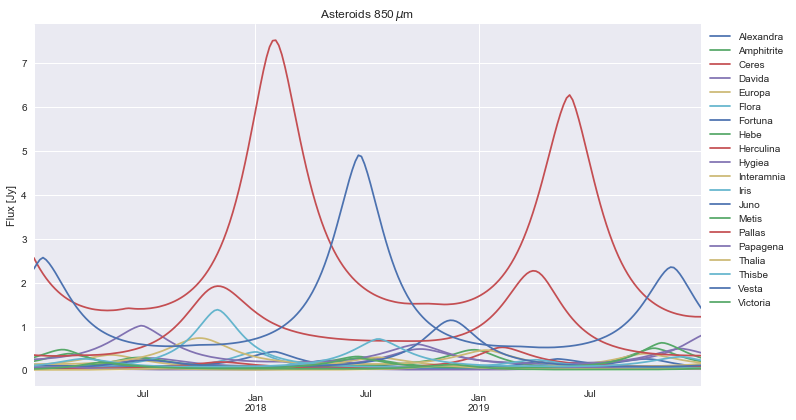

In [18]:
fig, ax = plt.subplots(figsize=(10,6))
for label, df in dfm["2017":"2022"].groupby('source'):
    df.fd850.plot(ax=ax, label=label)
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.ylabel("Flux [Jy]")
plt.title(r"Asteroids 850$\,\mu$m")
plt.xlabel("")
plt.tight_layout()
plt.savefig("asteroids_850.png", bbox_inches="tight", dpi=150)

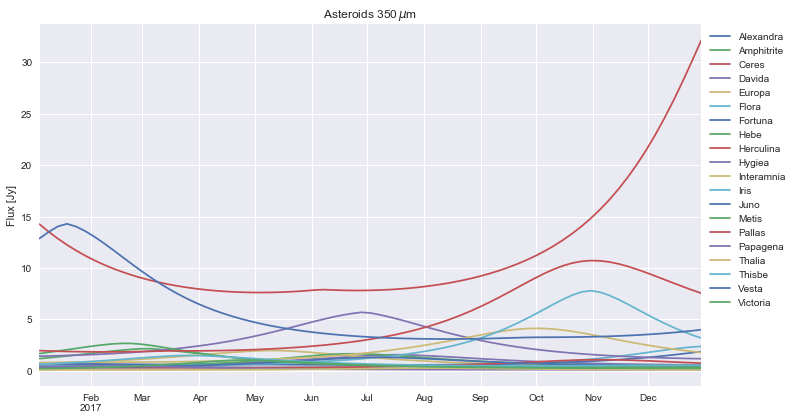

In [19]:
fig, ax = plt.subplots(figsize=(10,6))
for label, df in dfm["2017"].groupby('source'):
    df.fd350.plot(ax=ax, label=label)
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.ylabel("Flux [Jy]")
plt.title(r"Asteroids 350$\,\mu$m")
plt.xlabel("")
plt.tight_layout()
plt.savefig("asteroids_2017_350.png", bbox_inches="tight", dpi=150)

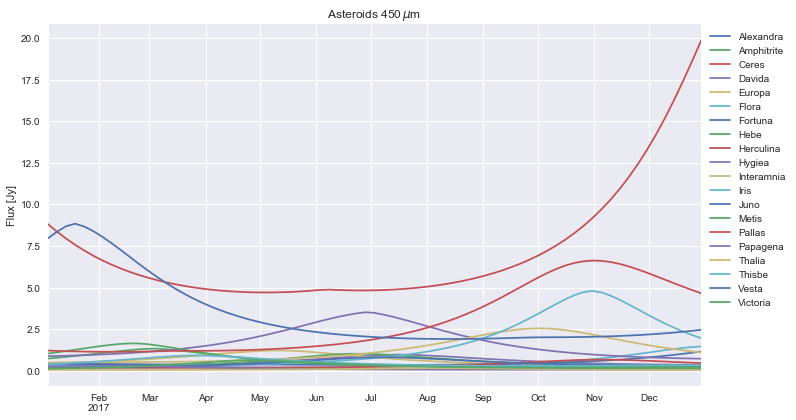

In [20]:
fig, ax = plt.subplots(figsize=(10,6))
for label, df in dfm["2017"].groupby('source'):
    df.fd450.plot(ax=ax, label=label)
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.ylabel("Flux [Jy]")
plt.title(r"Asteroids 450$\,\mu$m")
plt.xlabel("")
plt.tight_layout()
plt.savefig("asteroids_2017_450.png", bbox_inches="tight", dpi=150)

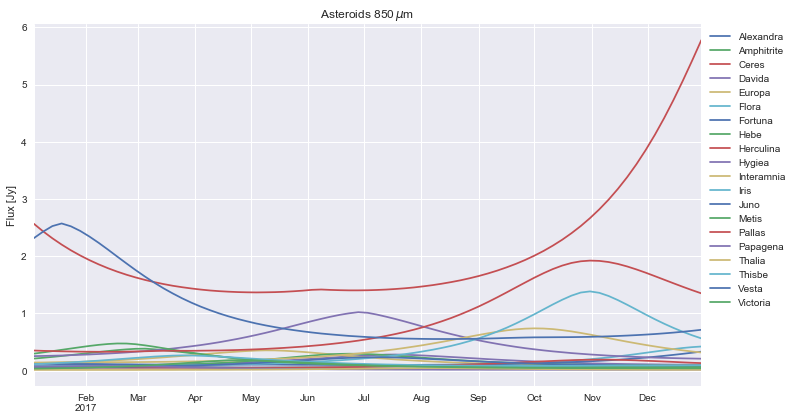

In [21]:
fig, ax = plt.subplots(figsize=(10,6))
for label, df in dfm["2017"].groupby('source'):
    df.fd850.plot(ax=ax, label=label)
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.ylabel("Flux [Jy]")
plt.title(r"Asteroids 850$\,\mu$m")
plt.xlabel("")
plt.tight_layout()
plt.savefig("asteroids_2017_850.png", bbox_inches="tight", dpi=150)

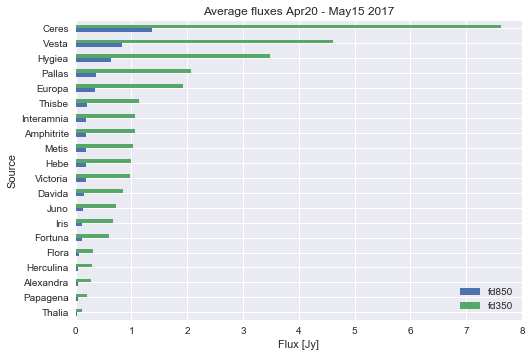

In [42]:
dfm["2017-Apr-20":"2017-May-15"].groupby('source')[["fd850","fd350"]].mean().sort_values("fd350").round(2).plot.barh()
plt.xlabel("Flux [Jy]")
plt.ylabel("Source")
plt.title("Average fluxes Apr20 - May15 2017")
plt.savefig("asteroids_2017-AprMay.png", bbox_inches="tight", dpi=150)

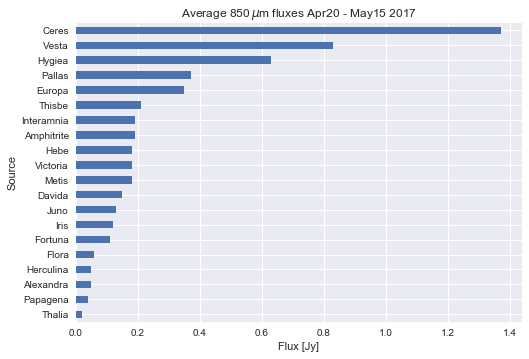

In [38]:
dfm["2017-Apr-20":"2017-May-15"].groupby('source').fd850.mean().round(2).sort_values().plot.barh()
plt.xlabel("Flux [Jy]")
plt.ylabel("Source")
plt.title("Average 850$\,\mu$m fluxes Apr20 - May15 2017")
plt.savefig("asteroids_2017-AprMay_850.png", bbox_inches="tight", dpi=150)

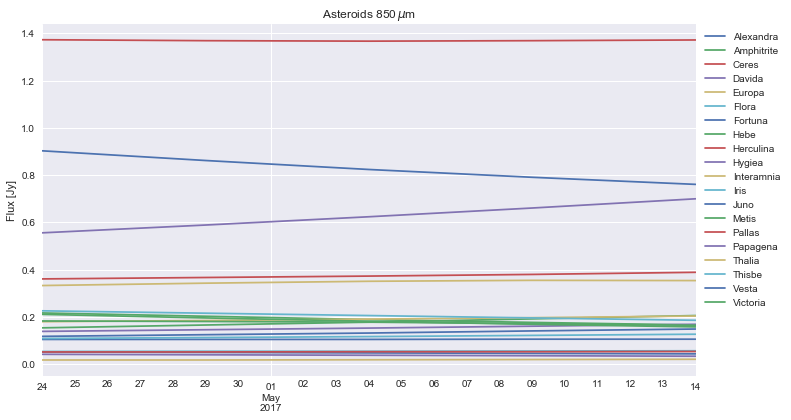

In [24]:
fig, ax = plt.subplots(figsize=(10,6))
for label, df in dfm["2017-Apr-20":"2017-May-15"].groupby('source'):
    df.fd850.plot(ax=ax, label=label)
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.ylabel("Flux [Jy]")
plt.title(r"Asteroids 850$\,\mu$m")
plt.xlabel("")
plt.tight_layout()
#plt.savefig("asteroids_2017-AprMay_850.png", bbox_inches="tight", dpi=150)

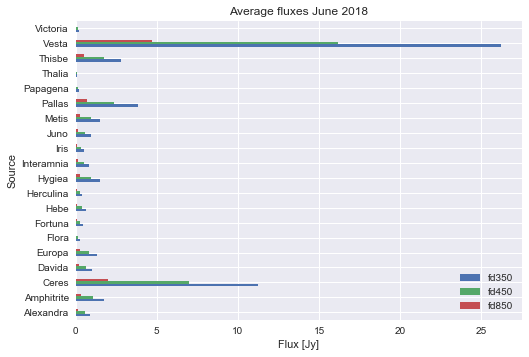

In [29]:
dfm["2018-Jun"].groupby('source')[["fd350","fd450","fd850"]].mean().round(2).plot.barh()
plt.xlabel("Flux [Jy]")
plt.ylabel("Source")
plt.title("Average fluxes June 2018")
plt.savefig("asteroids_2018-Jun.png", bbox_inches="tight", dpi=150)

In [31]:
top5 = dfm["2017-Apr-20":"2017-May-15"].groupby('source').mean().round(2).sort_values("fd850", ascending=False).head()

In [32]:
top5

,fd350,fd450,fd850,RA,DEC
source,,,,,
Ceres,7.62,4.71,1.37,59.81,18.79
Vesta,4.61,2.85,0.83,123.40,24.57
Hygiea,3.48,2.15,0.63,285.07,-24.20
Pallas,2.07,1.28,0.37,12.85,0.42
Europa,1.92,1.19,0.35,233.29,-8.28


In [30]:
from astropy import units as u
from astropy.coordinates import SkyCoord


In [34]:
c = SkyCoord(ra = top5.RA * u.degree, dec = top5.DEC * u.degree)

In [36]:
print(c)

<SkyCoord (ICRS): (ra, dec) in deg
    [(  59.81,  18.79), ( 123.4 ,  24.57), ( 285.07, -24.2 ),
     (  12.85,   0.42), ( 233.29,  -8.28)]>


In [37]:
c.to_string('hmsdms')

['03h59m14.4s +18d47m24s',
 '08h13m36s +24d34m12s',
 '19h00m16.8s -24d12m00s',
 '00h51m24s +00d25m12s',
 '15h33m09.6s -08d16m48s']